In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airplane-crash-fatalities-since-1908-dv-03032020/Airplane_Crashes_and_Fatalities_Since_1908_DV_03032020.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import datetime

# Pretty display for notebooks
%matplotlib inline

In [7]:
df = pd.read_csv("/kaggle/input/airplane-crash-fatalities-since-1908-dv-03032020/Airplane_Crashes_and_Fatalities_Since_1908_DV_03032020.csv")

In [8]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,DATE,TIME,LOCATION,OPERATOR,FLIGHT#,ROUTE,AIRCRAFT_TYPE,AIRCRAFT_REG,CN_LN,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army Air Forces,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",Unknown,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [13]:
print(df.shape)



(4975, 17)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975 entries, 0 to 4974
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  4975 non-null   object 
 1   TIME                  3459 non-null   object 
 2   LOCATION              4972 non-null   object 
 3   OPERATOR              4975 non-null   object 
 4   FLIGHT#               1318 non-null   object 
 5   ROUTE                 4196 non-null   object 
 6   AIRCRAFT_TYPE         4960 non-null   object 
 7   AIRCRAFT_REG          4701 non-null   object 
 8   CN_LN                 4302 non-null   object 
 9   TOTAL_ONBOARD         4957 non-null   float64
 10  PASSENGER_ONBOARD     4746 non-null   float64
 11  CREW_ONBOARD          4749 non-null   float64
 12  TOTAL_FATALITIES      4967 non-null   float64
 13  PASSENGER_FATALITIES  4732 non-null   float64
 14  CREW_FATALITIES       4733 non-null   float64
 15  GROUND_CASUALTIES    

In [14]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975 entries, 0 to 4974
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  4975 non-null   datetime64[ns]
 1   TIME                  3459 non-null   object        
 2   LOCATION              4972 non-null   object        
 3   OPERATOR              4975 non-null   object        
 4   FLIGHT#               1318 non-null   object        
 5   ROUTE                 4196 non-null   object        
 6   AIRCRAFT_TYPE         4960 non-null   object        
 7   AIRCRAFT_REG          4701 non-null   object        
 8   CN_LN                 4302 non-null   object        
 9   TOTAL_ONBOARD         4957 non-null   float64       
 10  PASSENGER_ONBOARD     4746 non-null   float64       
 11  CREW_ONBOARD          4749 non-null   float64       
 12  TOTAL_FATALITIES      4967 non-null   float64       
 13  PASSENGER_FATALITI

In [15]:
df.describe()

,DATE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES
count,4975,4957.000000,4746.000000,4749.000000,4967.000000,4732.000000,4733.000000,4934.000000
mean,1971-04-10 04:11:31.778894432,31.148880,26.960598,4.480943,22.386350,19.067836,3.581238,1.728820
min,1908-09-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1951-05-02 00:00:00,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,1970-09-03 00:00:00,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,1992-01-31 00:00:00,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,2020-02-05 00:00:00,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000
std,NaN,45.513508,44.090380,3.488020,35.143385,34.238083,3.170287,55.663983


In [16]:
df.isnull().sum()

DATE                       0
TIME                    1516
LOCATION                   3
OPERATOR                   0
FLIGHT#                 3657
ROUTE                    779
AIRCRAFT_TYPE             15
AIRCRAFT_REG             274
CN_LN                    673
TOTAL_ONBOARD             18
PASSENGER_ONBOARD        229
CREW_ONBOARD             226
TOTAL_FATALITIES           8
PASSENGER_FATALITIES     243
CREW_FATALITIES          242
GROUND_CASUALTIES         41
SUMMARY_OF_EVENTS         64
dtype: int64

AIRCRAFT_TYPE
Douglas DC-3                                333
De Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Antonov AN-26                                43
Douglas DC-4                                 38
Yakovlev YAK-40                              35
Junkers JU-52/3m                             31
De Havilland DH-4                            28
Douglas C-47B                                27
Douglas DC-6B                                27
Lockheed 18 Lodestar                         24
Breguet 14                                   22
Douglas DC-6                                 20
Curtiss C-46A                                19
Antonov AN-24                                19
Curtiss C-46                                 19
Antonov AN-12                                18
Douglas C-47-DL                              18
McDonnell Douglas DC-9-32                    18
Junkers F-13              

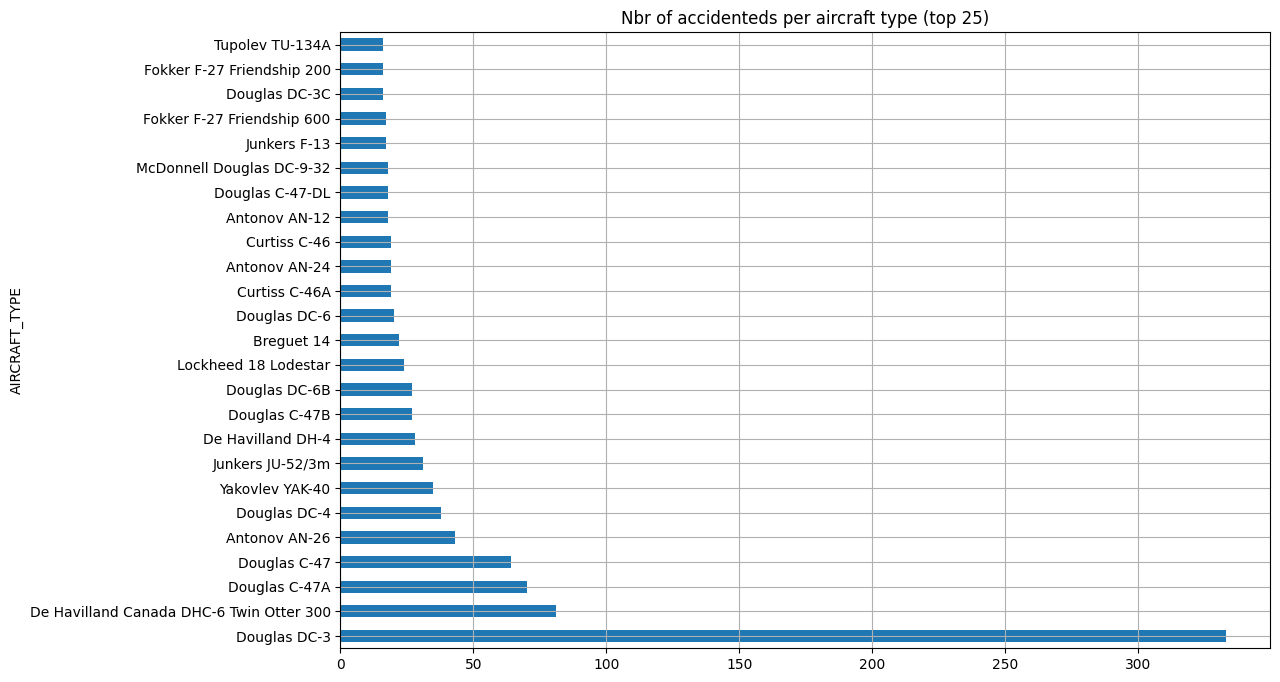

In [17]:
acc_per_ac_type = df['AIRCRAFT_TYPE'].value_counts().head(25)
acc_per_ac_type.plot(kind='barh', figsize=(12,8), title='Nbr of accidenteds per aircraft type (top 25)', grid=True)
acc_per_ac_type.head(25)

OPERATOR
Aeroflot                               257
Military - U.S. Air Force              151
Military - U.S. Army Air Forces         73
Air France                              72
Deutsche Lufthansa                      71
Military - UK Royal Air Force           54
United Air Lines                        44
China National Aviation Corporation     43
Pan American World Airways              42
American Airlines                       37
US Aerial Mail Service                  35
KLM Royal Dutch Airlines                35
Indian Airlines                         34
Philippine Air Lines                    33
Private                                 31
Military - U.S. Navy                    29
British Overseas Airways                29
Avianca                                 27
Eastern Air Lines                       25
Northwest Orient Airlines               25
Sabena                                  24
Aeropostale                             24
Imperial Airways                        23
Mi

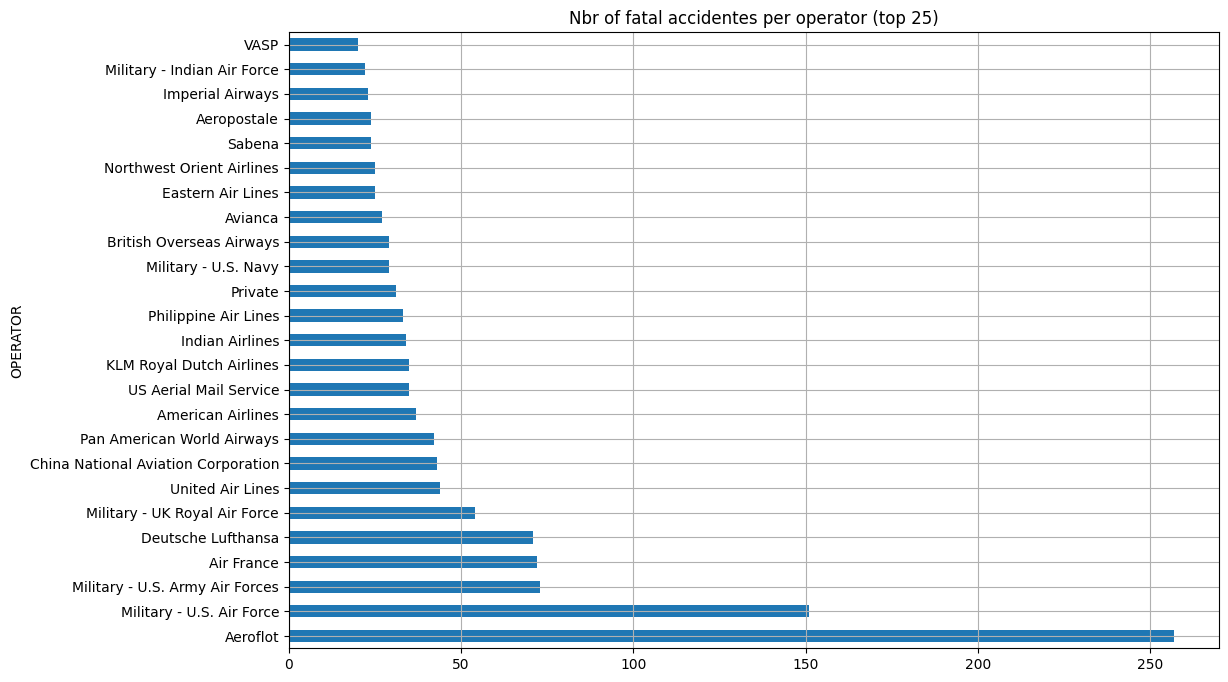

In [18]:
acc_per_operator = df['OPERATOR'].value_counts().head(25)
acc_per_operator.plot(kind='barh', figsize=(12,8), title='Nbr of fatal accidentes per operator (top 25)', grid=True)
acc_per_operator.head(25)

<Axes: title={'center': 'Nbr of aviation fatal accidents per year since 1908'}, xlabel='DATE'>

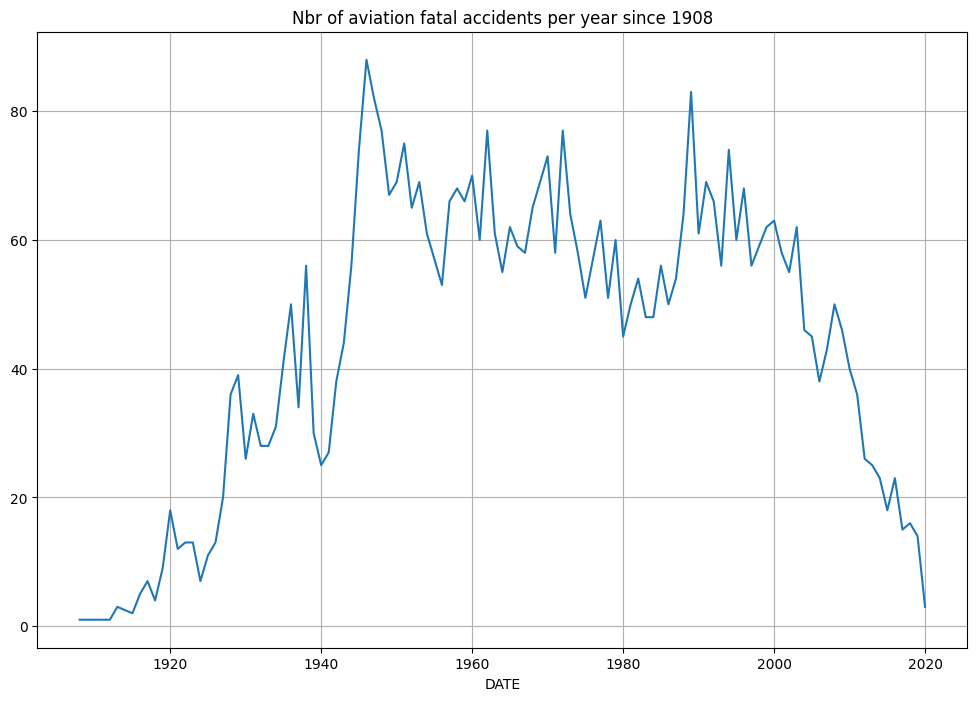

In [19]:
df['DATE'].groupby(df.DATE.dt.year).agg('count').plot(figsize=(12,8), title='Nbr of aviation fatal accidents per year since 1908', grid=True)

<Axes: title={'center': 'Nbr of aviation fatalities per year since 1908'}, xlabel='DATE'>

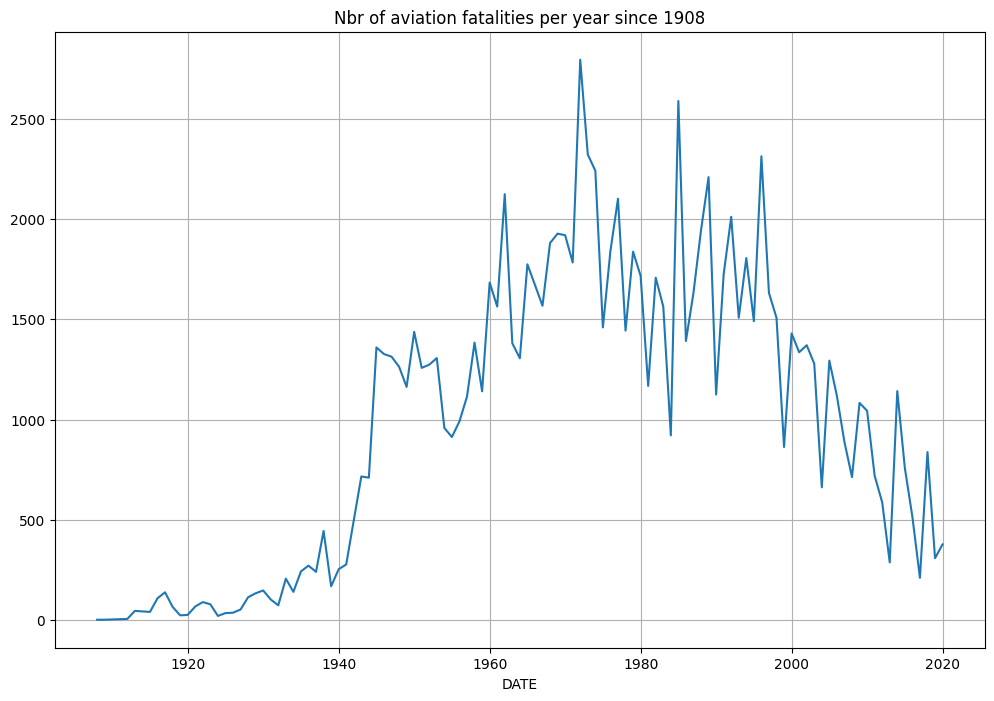

In [20]:
df['TOTAL_FATALITIES'].groupby(df.DATE.dt.year).agg('sum').plot(figsize=(12,8), title='Nbr of aviation fatalities per year since 1908', grid=True)

<Axes: title={'center': 'Nbr of aviation ground fatalities per year since 1908'}, xlabel='DATE'>

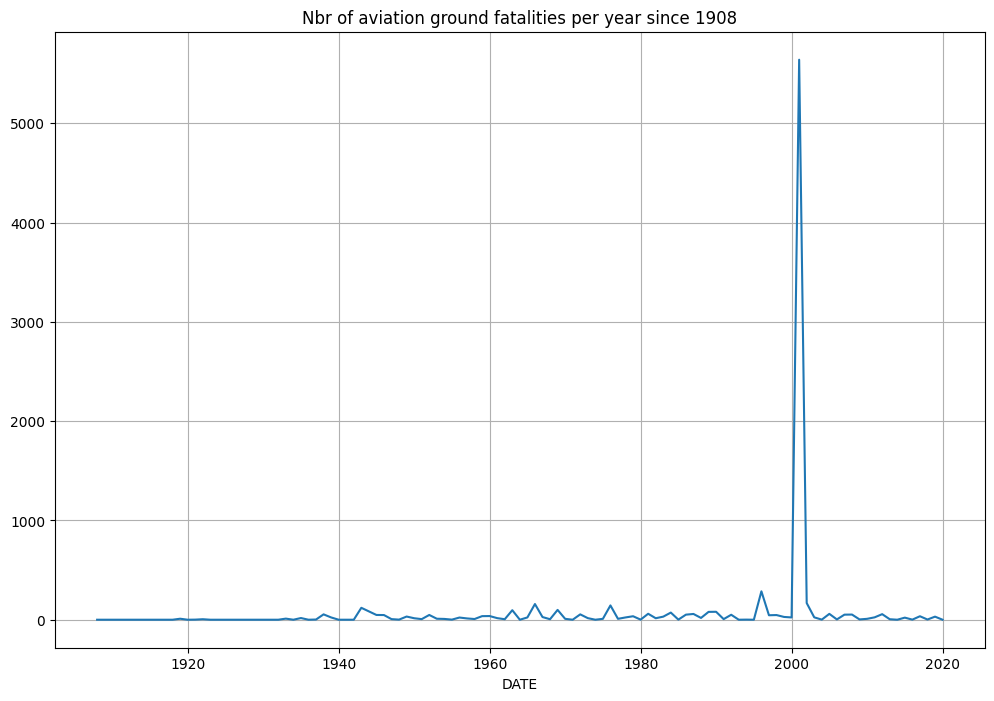

In [21]:
df['GROUND_CASUALTIES'].groupby(df.DATE.dt.year).agg('sum').plot(figsize=(12,8), title='Nbr of aviation ground fatalities per year since 1908', grid=True)

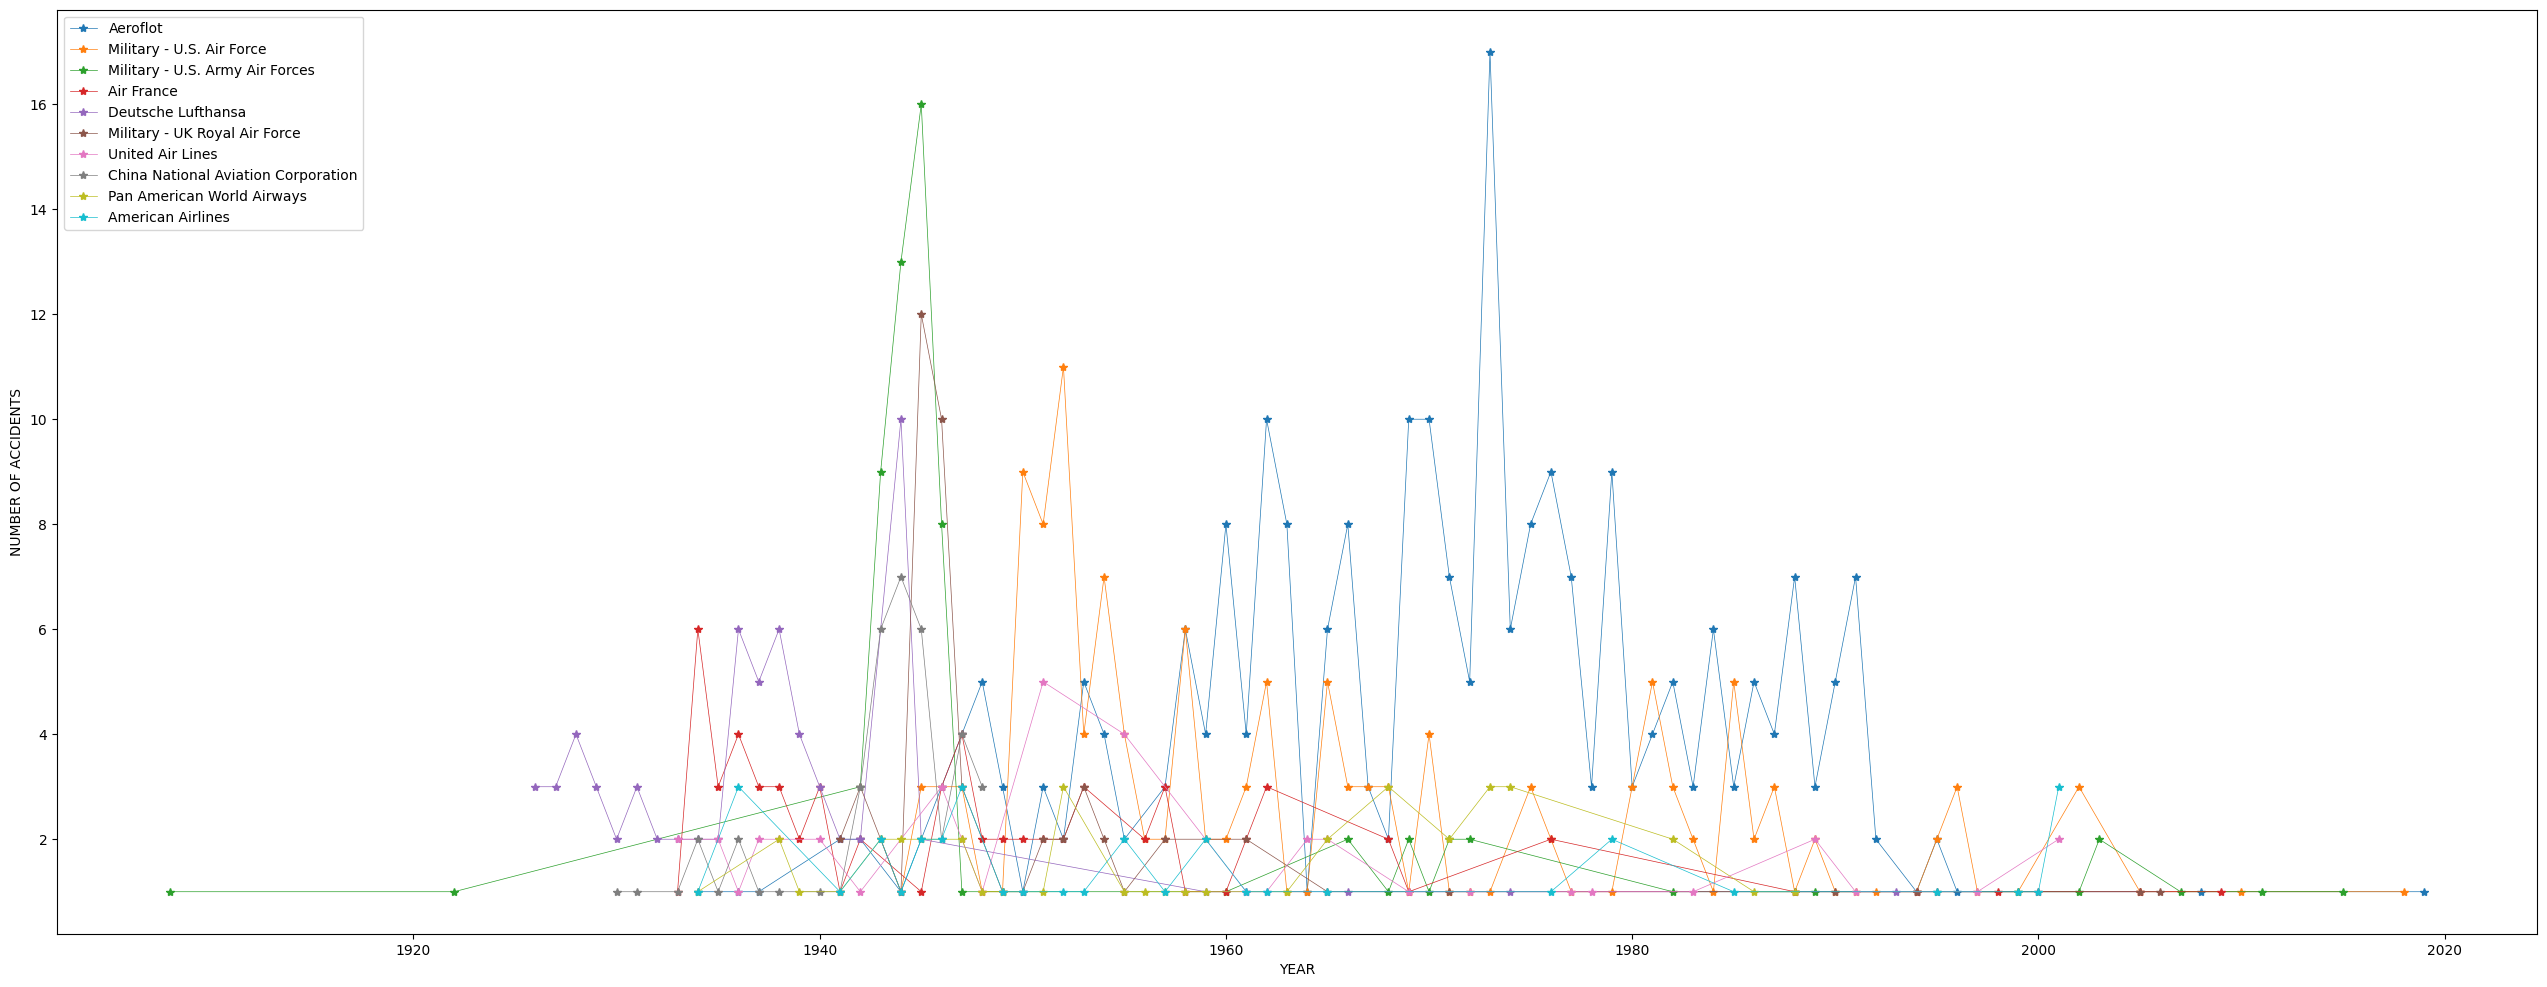

In [22]:
top10_acc_operator = acc_per_operator.head(10)

plt.figure(figsize=(32,12))
plt.xlabel ('YEAR')
plt.ylabel('NUMBER OF ACCIDENTS')

df_accidents = df[['DATE', 'OPERATOR']]

for op in top10_acc_operator.index:
  
  df_accidents_py = df_accidents[df_accidents.OPERATOR == op].groupby(df.DATE.dt.year).agg('count')
  plt.plot(df_accidents_py.index, df_accidents_py.DATE, linewidth=0.5, marker='*')

plt.legend(top10_acc_operator.index, loc='upper left')
plt.show()

In [24]:
df_summary = df['SUMMARY_OF_EVENTS']
df_summary


0       During a demonstration flight, a U.S. Army fly...
1       Eugene Lefebvre was the first pilot to ever be...
2       First U.S. dirigible Akron exploded just offsh...
3       The first fatal airplane accident in Canada oc...
4       The airship flew into a thunderstorm and encou...
                              ...                        
4970    The passenger plane crashed about a minute aft...
4971    While taking off, the tail of the plane struck...
4972    The aircraft crashed shortly after taking off ...
4973    The plane took off from Tehran International A...
4974    While landing duriing high winds and heavey ra...
Name: SUMMARY_OF_EVENTS, Length: 4975, dtype: object

In [26]:
import spacy
import string
#from spacy.lang.en.stop_words import STOP_WORDS
#from spacy.lang.en import English

nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS
print("Nbr. of stop words: %d" %len(stop_words))
punctuation = string.punctuation
punctuation


Nbr. of stop words: 326


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
def spacy_tokenizer(sentence):
    # Create token object
    mytokens = nlp(sentence)
    #mytokens = parser(sentence)

    # Lemmatize each token and convert it into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Remove stop words and punctuations
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuation ]

    # return preprocessed list of tokens
    return mytokens
    

In [30]:
test_sentence = "While attempting to land in rain and fog, the aircraft ran out of fuel, stalled and crashed at Lunghwa field."
tokens = spacy_tokenizer(test_sentence)
tokens

['attempt',
 'land',
 'rain',
 'fog',
 'aircraft',
 'run',
 'fuel',
 'stall',
 'crash',
 'lunghwa',
 'field']

In [29]:
tokens = []

for x in df.SUMMARY_OF_EVENTS:
  tokens.append(spacy_tokenizer(str(x)))
  
df['TOKENS'] = tokens
df['TOKENS'].head(20)

0     [demonstration, flight, u.s., army, flyer, fly...
1     [eugene, lefebvre, pilot, kill, air, accident,...
2     [u.s., dirigible, akron, explode, offshore, al...
3     [fatal, airplane, accident, canada, occur, ame...
4     [airship, fly, thunderstorm, encounter, severe...
5     [hydrogen, gas, vent, suck, forward, engine, i...
6     [crash, tree, attempt, land, shoot, british, f...
7     [explode, burn, near, neuwerk, island, hydroge...
8             [crash, near, black, sea, cause, unknown]
9               [shot, british, aircraft, crash, flame]
10    [shot, flame, british, 39th, home, defence, sq...
11                                       [crash, storm]
12    [shot, british, anti, aircraft, fire, aircraft...
13                                [caught, fire, crash]
14              [strike, lightning, crash, baltic, sea]
15    [crash, sea, altitude, 3,000, ft, hit, british...
16                            [shot, british, aircraft]
17                                     [shot, ai

In [31]:
hash_map = {}

for tokens in df['TOKENS']:
  for word in tokens:
    if word in hash_map:
      hash_map[word] = hash_map[word] + 1
    else:
      hash_map[word] = 1

# Order the dictionary by highest values first
#hash_map = {k: v for k, v in sorted(hash_map.items(), key=lambda item: item[1], reverse=True)}

# Search for the frequency of specific relevant words
words_list = ['rain', 'fog', 'wind', 'snow', 'turbulence', 'storm', 'clear', 
              'midair', 'sea', 'ocean', 'mountain', 'hill', 'building', 
              'residential', 'hijack', 'missile', 'failure', 'malfunction', 
              'explosion', 'collision', 'overload', 'takeoff', 'climb',
              'cruise', 'descend', 'landing']

for w in words_list:
  print(w + " : " + str(hash_map[w]))

rain : 206
fog : 334
wind : 146
snow : 107
turbulence : 133
storm : 74
clear : 96
midair : 95
sea : 262
ocean : 132
mountain : 614
hill : 152
building : 73
residential : 27
hijack : 24
missile : 47
failure : 851
malfunction : 60
explosion : 65
collision : 140
overload : 52
takeoff : 533
climb : 200
cruise : 59
descend : 288
landing : 659


In [32]:
weather_words = {'rain', 'fog', 'wind', 'snow', 'turbulence', 'storm', 'clear'}
weather_df = []

for w in weather_words:
  print(w + " : " + str(hash_map[w]))
  weather_df.append([w, hash_map[w]])

weather_df = pd.DataFrame(weather_df, columns=['WEATHER_CONDITION', 'NBR_ACCIDENTS'])
weather_df

wind : 146
turbulence : 133
snow : 107
rain : 206
clear : 96
storm : 74
fog : 334


,WEATHER_CONDITION,NBR_ACCIDENTS
0,wind,146
1,turbulence,133
2,snow,107
3,rain,206
4,clear,96
5,storm,74
6,fog,334


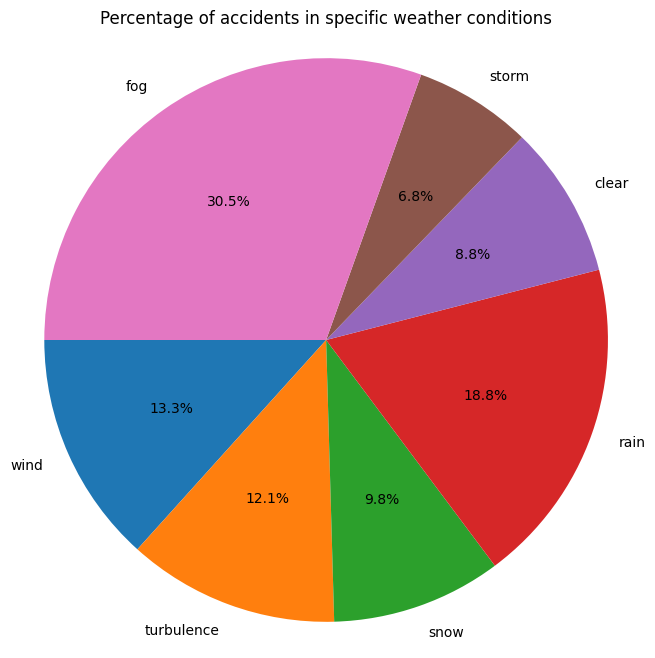

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,8

fig1, ax1 = plt.subplots()
ax1.pie(weather_df.NBR_ACCIDENTS, labels=weather_df.WEATHER_CONDITION, autopct='%1.1f%%', startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of accidents in specific weather conditions')
plt.show()

In [35]:
flight_phase_words = {'takeoff', 'climb', 'cruise', 'descend', 'landing'}
flight_phase_df = []

for f in flight_phase_words:
  print(f + " : " + str(hash_map[f]))
  flight_phase_df.append([f, hash_map[f]])
  
flight_phase_df = pd.DataFrame(flight_phase_df, columns=['FLIGHT_PHASE', 'NBR_ACCIDENTS'])
flight_phase_df

cruise : 59
climb : 200
landing : 659
descend : 288
takeoff : 533


,FLIGHT_PHASE,NBR_ACCIDENTS
0,cruise,59
1,climb,200
2,landing,659
3,descend,288
4,takeoff,533


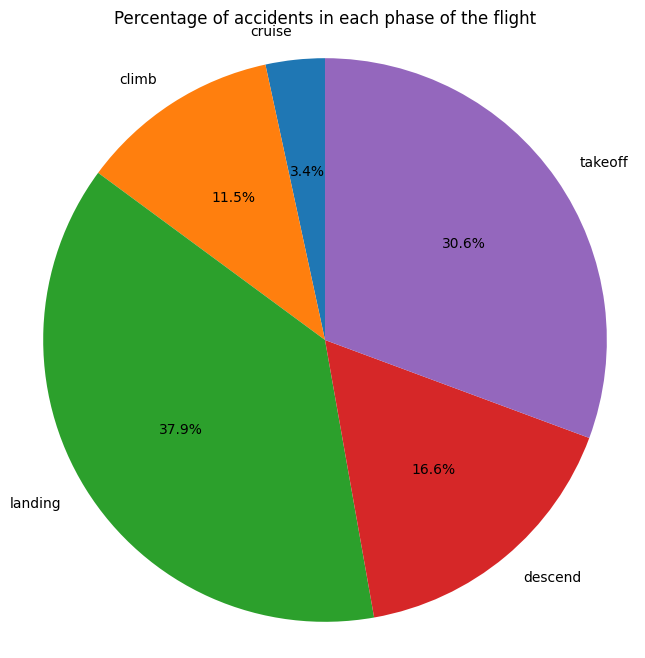

In [36]:
fig2, ax2 = plt.subplots()
ax2.pie(flight_phase_df.NBR_ACCIDENTS, labels=flight_phase_df.FLIGHT_PHASE, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of accidents in each phase of the flight')
plt.show()

In [37]:
crash_zone_words = {'midair', 'sea', 'mountain', 'residential'}
crash_zone_df = []

for z in crash_zone_words:
  print(z + " : " + str(hash_map[z]))
  if (z == 'sea'):
    crash_zone_df.append([z, hash_map[z] + hash_map['ocean']])
  elif (z == 'mountain'):
    crash_zone_df.append([z, hash_map[z] + hash_map['hill']])
  elif (z == 'residential'):
    crash_zone_df.append([z, hash_map[z] + hash_map['building']])
  else:
    crash_zone_df.append([z, hash_map[z]])

  
crash_zone_df = pd.DataFrame(crash_zone_df, columns=['CRASH_ZONE', 'NBR_ACCIDENTS'])
crash_zone_df

sea : 262
residential : 27
midair : 95
mountain : 614


,CRASH_ZONE,NBR_ACCIDENTS
0,sea,394
1,residential,100
2,midair,95
3,mountain,766


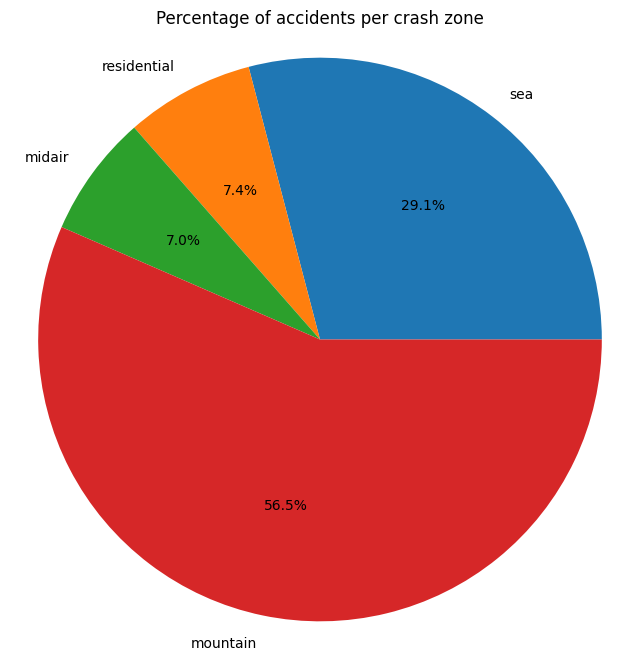

In [38]:
fig3, ax3 = plt.subplots()
ax3.pie(crash_zone_df.NBR_ACCIDENTS, labels=crash_zone_df.CRASH_ZONE, autopct='%1.1f%%', startangle=0)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of accidents per crash zone')
plt.show()

In [39]:
crash_reason_words = {'hijack', 'missile', 'failure', 'malfunction', 'explosion', 'overload'}
crash_reason_df = []

for r in crash_reason_words:
  print(r + " : " + str(hash_map[r]))
  crash_reason_df.append([r, hash_map[r]])
  
crash_reason_df = pd.DataFrame(crash_reason_df, columns=['CRASH_REASON', 'NBR_ACCIDENTS'])
crash_reason_df

failure : 851
explosion : 65
overload : 52
missile : 47
malfunction : 60
hijack : 24


,CRASH_REASON,NBR_ACCIDENTS
0,failure,851
1,explosion,65
2,overload,52
3,missile,47
4,malfunction,60
5,hijack,24


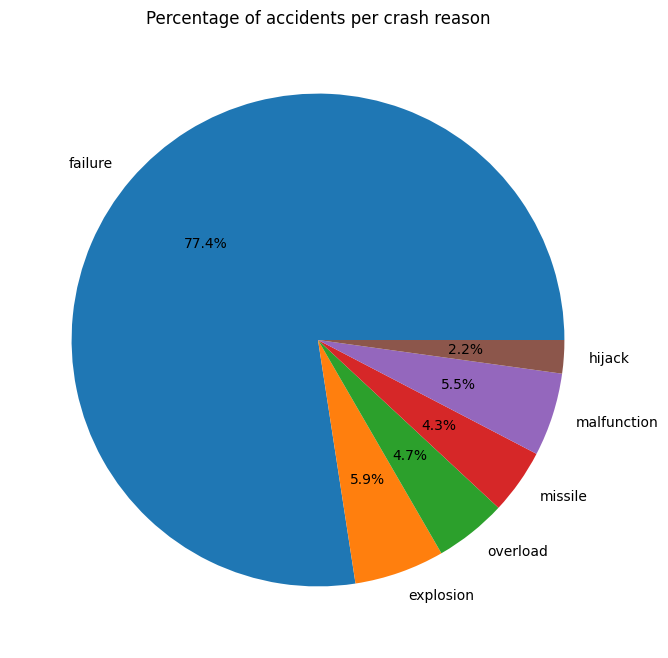

In [40]:
fig4, ax4 = plt.subplots()
ax4.pie(crash_reason_df.NBR_ACCIDENTS, labels=crash_reason_df.CRASH_REASON, autopct='%1.1f%%')
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of accidents per crash reason')
plt.show()

In [42]:
# Αφαίρεση γραμμών με missing τιμές στις στήλες που είναι κρίσιμες για την ανάλυση
df = df.dropna(subset=['TOTAL_ONBOARD', 'TOTAL_FATALITIES', 'OPERATOR', 'AIRCRAFT_TYPE'])

# Αντικατάσταση missing τιμών στις στήλες 'TIME' και 'LOCATION' με μια εικονική τιμή
df['TIME'].fillna('Unknown', inplace=True)
df['LOCATION'].fillna('Unknown', inplace=True)

# Για τις υπόλοιπες στήλες, αν χρειάζεται μπορούμε να αντικαταστήσουμε τα NaN με 0
df.fillna(0, inplace=True)

# Ανάγνωση μετά το καθαρισμό
print(df.isnull().sum())


DATE                    0
TIME                    0
LOCATION                0
OPERATOR                0
FLIGHT#                 0
ROUTE                   0
AIRCRAFT_TYPE           0
AIRCRAFT_REG            0
CN_LN                   0
TOTAL_ONBOARD           0
PASSENGER_ONBOARD       0
CREW_ONBOARD            0
TOTAL_FATALITIES        0
PASSENGER_FATALITIES    0
CREW_FATALITIES         0
GROUND_CASUALTIES       0
SUMMARY_OF_EVENTS       0
TOKENS                  0
dtype: int64


/tmp/ipykernel_35/2516748621.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TIME'].fillna('Unknown', inplace=True)
/tmp/ipykernel_35/2516748621.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [43]:
from sklearn.preprocessing import LabelEncoder

# Κωδικοποίηση κατηγορικών μεταβλητών
le_operator = LabelEncoder()
df['OPERATOR_CODE'] = le_operator.fit_transform(df['OPERATOR'])

le_aircraft_type = LabelEncoder()
df['AIRCRAFT_TYPE_CODE'] = le_aircraft_type.fit_transform(df['AIRCRAFT_TYPE'])

# Εξετάζουμε τα αποτελέσματα
df[['OPERATOR', 'OPERATOR_CODE', 'AIRCRAFT_TYPE', 'AIRCRAFT_TYPE_CODE']].head()


,OPERATOR,OPERATOR_CODE,AIRCRAFT_TYPE,AIRCRAFT_TYPE_CODE
0,Military - U.S. Army Air Forces,1313,Wright Flyer III,2388
1,Unknown,2025,Wright Byplane,2387
2,Military - U.S. Navy,1319,Dirigible,1063
3,Private,1546,Curtiss seaplane,938
4,Military - German Navy,1221,Zeppelin L-1 (airship),2403


In [44]:
# Δημιουργία νέας στήλης που να δείχνει αν το ατύχημα είχε θύματα
df['Is_Fatal'] = (df['TOTAL_FATALITIES'] > 0).astype(int)

# Επιλογή χαρακτηριστικών
features = ['TOTAL_ONBOARD', 'OPERATOR_CODE', 'AIRCRAFT_TYPE_CODE']
X = df[features]
y = df['Is_Fatal']

# Χωρισμός σε train και test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Εκπαίδευση του μοντέλου
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Πρόβλεψη με το μοντέλο
y_pred = model.predict(X_test)

# Αξιολόγηση του μοντέλου
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[  2  10]
 [  3 974]]

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.17      0.24        12
           1       0.99      1.00      0.99       977

    accuracy                           0.99       989
   macro avg       0.69      0.58      0.61       989
weighted avg       0.98      0.99      0.98       989



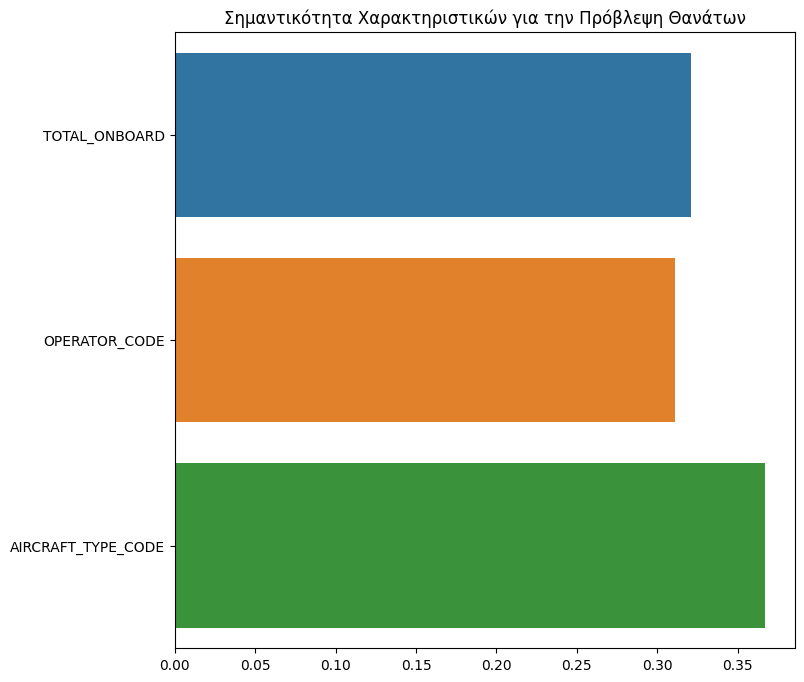

In [46]:
importances = model.feature_importances_
feat_names = X.columns

# Οπτικοποίηση της σημαντικότητας
sns.barplot(x=importances, y=feat_names)
plt.title("Σημαντικότητα Χαρακτηριστικών για την Πρόβλεψη Θανάτων")
plt.show()


In [47]:
# Δημιουργία νέων χαρακτηριστικών από 'DATE'
df['Year'] = pd.to_datetime(df['DATE']).dt.year
df['Month'] = pd.to_datetime(df['DATE']).dt.month
df['Hour'] = pd.to_datetime(df['TIME'], errors='coerce').dt.hour

# Δημιουργία νέων χαρακτηριστικών για θύματα
df['Total_Casualties'] = df['TOTAL_FATALITIES'] + df['GROUND_CASUALTIES']

# Χαρακτηριστικά για το πλήρωμα
df['Crew_Fatalities_Rate'] = df['CREW_FATALITIES'] / df['CREW_ONBOARD']

# Επιλογή νέων χαρακτηριστικών
features_extended = ['TOTAL_ONBOARD', 'PASSENGER_ONBOARD', 'CREW_ONBOARD', 'OPERATOR_CODE', 'AIRCRAFT_TYPE_CODE', 'Year', 'Month', 'Hour', 'Total_Casualties', 'Crew_Fatalities_Rate']
X_extended = df[features_extended]


/tmp/ipykernel_35/1262514342.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['TIME'], errors='coerce').dt.hour


In [48]:
from sklearn.linear_model import LogisticRegression

# Εκπαίδευση με Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Πρόβλεψη
y_pred_log_reg = log_reg_model.predict(X_test)

# Αξιολόγηση
print("Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression - Confusion Matrix:
[[  0  12]
 [  1 976]]

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.99      1.00      0.99       977

    accuracy                           0.99       989
   macro avg       0.49      0.50      0.50       989
weighted avg       0.98      0.99      0.98       989



In [49]:
import xgboost as xgb

# Δημιουργία του XGBoost μοντέλου
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Πρόβλεψη
y_pred_xgb = xgb_model.predict(X_test)

# Αξιολόγηση
print("XGBoost - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nXGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost - Confusion Matrix:
[[  0  12]
 [  3 974]]

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.99      1.00      0.99       977

    accuracy                           0.98       989
   macro avg       0.49      0.50      0.50       989
weighted avg       0.98      0.98      0.98       989



In [50]:
from sklearn.svm import SVC

# Εκπαίδευση με SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Πρόβλεψη
y_pred_svm = svm_model.predict(X_test)

# Αξιολόγηση
print("SVM - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nSVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM - Confusion Matrix:
[[  0  12]
 [  0 977]]

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.99      1.00      0.99       977

    accuracy                           0.99       989
   macro avg       0.49      0.50      0.50       989
weighted avg       0.98      0.99      0.98       989



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
from sklearn.model_selection import GridSearchCV

# Ορισμός του μοντέλου Random Forest με GridSearch
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Βέλτιστες παραμέτροι και αξιολόγηση
print(f"Best Parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)

# Αξιολόγηση
print("GridSearch Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_grid))

print("\nGridSearch Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_grid))


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
GridSearch Random Forest - Confusion Matrix:
[[  2  10]
 [  1 976]]

GridSearch Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.17      0.27        12
           1       0.99      1.00      0.99       977

    accuracy                           0.99       989
   macro avg       0.83      0.58      0.63       989
weighted avg       0.99      0.99      0.99       989



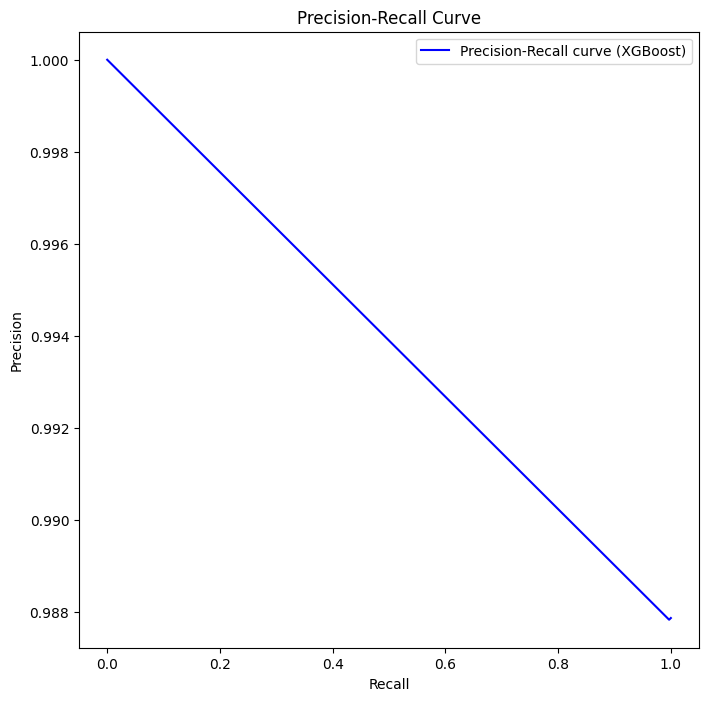

Average Precision: 0.987829727963457


In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Precision-Recall Curve για το καλύτερο μοντέλο
precision, recall, _ = precision_recall_curve(y_test, y_pred_xgb)

plt.plot(recall, precision, color='blue', label='Precision-Recall curve (XGBoost)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Μέσο Precision
avg_precision = average_precision_score(y_test, y_pred_xgb)
print(f"Average Precision: {avg_precision}")
